total spot cnt 51
(51, 1)


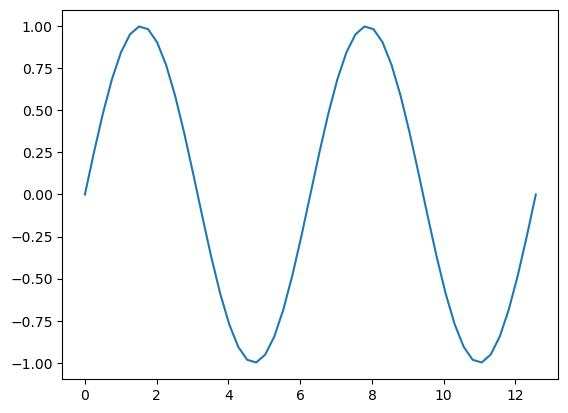

51


In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
pi = 3.141592653589
sin_x = []
sin_y = []

period = 2 #int(input("sin함수의 주기:"))
spot = 25 #int(input("한 주기 당 점의 개수:"))
total_spot = period*spot+1
print("total spot cnt",total_spot)
for i in range(total_spot):#0부터 사인파 period만큼, 한 period 당 점의 갯수 spot
    now_x = i*2*pi/spot
    sin_x.append([now_x])
    sin_y.append([math.sin(now_x)])
#print(sin_x)
print(np.array(sin_x).shape)
plt.plot(sin_x,sin_y)
plt.show()

X = sin_x
print(len(X))
T = sin_y

In [2]:
#LSTM 입력크기
n_in = 1
#Dense의 parameter 초기화
#n_out = int(input("Desne의 output의 크기:"))
n_out = 1
print('Dense_out',n_out)

n_mid = 20
#n_mid = int(input("LSTM output_size:"))
print('LSTM_out',n_mid)

Dense_out 1
LSTM_out 20


In [3]:
n_time =10 #int(input("한번에 고려할 시점 수:")) #한번에 고려할 시점의 개수
batch_size = 8 #int(input("배치 사이즈:"))
epochs = 101
eta = 0.01
interval = 10  # # 경과 표시 간격

input_data=[]
correct_data=[]
n_sample = len(X)-n_time
for i in range(n_sample): # [0 1 2 3 4]를 2시점 씩 고려하면 [0 1] [1 2] [2 3] [3 4] 총 4가지가 되므로 
    smallX=[]
    for j in range(n_time):
        smallX.append(X[i+j])
    input_data.append(smallX)
    correct_data.append(X[i+n_time])
'''
print("X:",np.array(input_data).shape)
print(np.array(input_data[1]))
print("Y:",np.array(correct_data).shape)
print(np.array(correct_data[0]))
'''

'\nprint("X:",np.array(input_data).shape)\nprint(np.array(input_data[1]))\nprint("Y:",np.array(correct_data).shape)\nprint(np.array(correct_data[0]))\n'

In [4]:
def element_sum(arr1, arr2):
    if len(arr1) != len(arr2)  or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] + arr2[i][j])
        result.append(row)
    
    return result

In [5]:
def element_multi(arr1, arr2):
    if len(arr1) != len(arr2) or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] * arr2[i][j])
        result.append(row)
    return result

In [6]:
def matrix_product(A, B):
    if type(A[0]) != list:
        A = [A]

    if len(A[0]) != len(B):
        raise ValueError("행렬 곱 연산이 불가능합니다.")

    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            dot_product = 0
            for k in range(len(A[0])):
                dot_product += A[i][k] * B[k][j]
            result[i][j] = dot_product
    return result

In [7]:
# 예시 배열 생성 (4, 20, 1)
original_array =  [
    [
        [0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]
    ],
    [
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]
    ],
    [
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]
    ]
]
n = np.array(original_array)
print(n.shape)
print(n)

(3, 4, 5)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]


In [8]:
def transpose_021(arr):
    new_matrix = [[[0 for i in range(len(arr[0]))] for i in range(len(arr[0][0]))] for i in range(len(arr))]
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            for k in range(len(arr[0][0])):
                new_matrix[i][k][j] = arr[i][j][k]
    return new_matrix

In [9]:
a =transpose_021(original_array)
print(np.array(a).shape)
print(np.array(a))

(3, 5, 4)
[[[ 0  5 10 15]
  [ 1  6 11 16]
  [ 2  7 12 17]
  [ 3  8 13 18]
  [ 4  9 14 19]]

 [[20 25 30 35]
  [21 26 31 36]
  [22 27 32 37]
  [23 28 33 38]
  [24 29 34 39]]

 [[40 45 50 55]
  [41 46 51 56]
  [42 47 52 57]
  [43 48 53 58]
  [44 49 54 59]]]


In [10]:
print(n.transpose(0,2,1).shape)
print(n.transpose(0,2,1))

(3, 5, 4)
[[[ 0  5 10 15]
  [ 1  6 11 16]
  [ 2  7 12 17]
  [ 3  8 13 18]
  [ 4  9 14 19]]

 [[20 25 30 35]
  [21 26 31 36]
  [22 27 32 37]
  [23 28 33 38]
  [24 29 34 39]]

 [[40 45 50 55]
  [41 46 51 56]
  [42 47 52 57]
  [43 48 53 58]
  [44 49 54 59]]]


In [11]:
arr2d = [
        [0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]
    ]

In [12]:
def transpose_10(arr):
    new_matrix = [[0 for i in range(len(arr))] for i in range(len(arr[0]))] 
    for i in range(len(arr)):
        for j in range(len(arr[0])):
                new_matrix[j][i] = arr[i][j]
    return new_matrix

In [13]:
np.array(arr2d).shape

(4, 5)

In [14]:
a = transpose_10(arr2d)
print(np.array(a).shape)
print(np.array(a))

(5, 4)
[[ 0  5 10 15]
 [ 1  6 11 16]
 [ 2  7 12 17]
 [ 3  8 13 18]
 [ 4  9 14 19]]


In [15]:
class LSTMLayer:
    def __init__(self,n_upper,n):
        #가중치 초기화: 가우시안 초기화 방법,  He 초기화 (He Initialization) 또는 Xavier 초기화 (Glorot Initialization)도 존재
        self.w = []
        self.v = []
        self.b = []
        for _ in range(4): ## 망각 게이트,입력 게이트,새로운 기억, 출력 게이트 총 4개에서 업데이트 해야함
            w0=[[random.gauss(0,1) for i in range(n)] for j in range(n_upper)] # X는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size) 
            #print(np.array(w0).shape)
            v0=[[random.gauss(0,1) for i in range(n)]for j in range(n)]  # Y는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size)
            #print(np.array(v0).shape)
            b0=[0 for i in range(n)] 
            #print(np.array(b0).shape)
            self.w.append(w0)
            self.v.append(v0)
            self.b.append(b0)
        """
        print("Lw",np.array(self.w).shape)
        print("Lv",np.array(self.v).shape)
        print("Lb",np.array(self.b).shape)
        """
    def forward(self, x, y_prev, c_prev):
        reshape_b = []
        for i in range(4):
            reshape_b.append([self.b[i] for _ in range(len(x))])
        #print("reshape_b",np.array(reshape_b).shape)
        #print("self.b",np.array(self.b))
        u = []
        for i in range(4):
            Xw = matrix_product(x, self.w[i])
            Yv = matrix_product(y_prev, self.v[i])
            Xw_Yv = element_sum(Xw,Yv)
            u.append(element_sum(element_sum(Xw,Yv),reshape_b[i]))
        #print("u",np.array(u).shape)
        #print("Xw",np.array(Xw).shape)
        #print(x)
        #print("self.b",np.array(self.b).shape)
        #print("self.b",np.array(self.b))
        #print(self.w)
        a0 = activation('Sigmoid',u[0])  # 망각 게이트
        a1 = activation('Sigmoid',u[1])  # 입력 게이트
        a2 = activation('Tanh',u[2])  # 새로운 기억
        a3 = activation('Sigmoid',u[3])  # 출력 게이트

        self.gates = []
        self.gates.append(a0)
        self.gates.append(a1)
        self.gates.append(a2)
        self.gates.append(a3)
        #print("gates",np.array(self.gates).shape)
        self.c = element_sum(element_multi(a0,c_prev),element_multi(a1,a2))
        tanh_c = activation('Tanh',self.c)
        self.y = element_multi(a3,tanh_c)
        #print("self.c",np.array(self.c).shape)
        #print("self.y",np.array(self.y).shape)

    def reset_sum_grad(self):
        #print("self.w",np.array(self.w).shape)
        #print("self.v",np.array(self.v).shape)
        #print("self.b",np.array(self.b).shape)

        self.grad_w = like_3d(self.w,0)
        self.grad_v = like_3d(self.v,0)
        self.grad_b = like_2d(self.b,0)

        #print("self.grad_w",np.array(self.grad_w).shape)
        #print("self.grad_v",np.array(self.grad_v).shape)
        #print("self.grad_b",np.array(self.grad_b).shape)
    
    def backward(self, x, y, c, y_prev, c_prev, gates, grad_y, grad_c):
        a0 = gates[0]
        a1 = gates[1]
        a2 = gates[2]
        a3 = gates[3]
        tanh_c = activation('Tanh',c)
        martrix_1=[]
        for i in tanh_c:
            new_c=[]
            for j in tanh_c[0]:
                new_c.append(1)
            martrix_1.append(new_c)
        r = element_sum(grad_c,element_multi(element_multi(grad_y,a3),element_diff(martrix_1,element_multi(tanh_c,tanh_c))))
        delta_a0 = element_multi(element_multi(element_multi(r ,c_prev), a0) ,element_diff(martrix_1,a0))
        delta_a1 = element_multi(element_multi(element_multi(r ,a2), a1) ,element_diff(martrix_1,a1))
        delta_a2 = element_multi(element_multi(r ,a1) ,element_diff(martrix_1,element_multi(a2,a2)))
        delta_a3 = element_multi(element_multi(element_multi(grad_y,tanh_c),a3),element_diff(martrix_1,a3))
        """
        print("r",np.array(r).shape)
        print("delta_a0",np.array(delta_a0).shape)
        print("delta_a1",np.array(delta_a1).shape)
        print("delta_a2",np.array(delta_a2).shape)
        print("delta_a3",np.array(delta_a3).shape)
        """
        deltas = []
        deltas.append(delta_a0)
        deltas.append(delta_a1)
        deltas.append(delta_a2)
        deltas.append(delta_a3)
        #print(np.array(transpose_matrix(x)).shape)
        #print("deltas",np.array(deltas).shape)
        #print("self.grad_w",np.array(self.grad_w).shape)
        #print("matmul",np.array(matrix_product(transpose_matrix(x),deltas[0])).shape)
        add_grad_w = []
        for i in range(4):
            add_grad_w.append(matrix_product(transpose_matrix(x),deltas[i]))
        self.grad_w = element_sum_3d(self.grad_w,add_grad_w)
        #print('add_grad_w',np.array(add_grad_w).shape)
        #print("self.grad_w",np.array(self.grad_w).shape)
        add_grad_v = []
        for i in range(4):
            add_grad_v.append(matrix_product(transpose_matrix(y_prev),deltas[i]))
        self.grad_v = element_sum_3d(self.grad_v,add_grad_v)
    
        self.grad_b = element_sum(self.grad_b,Sum_3D(deltas,axis=1))
        
        grad_x = []
        for i in range(4):
            grad_x.append(matrix_product(deltas[i],transpose_10(self.w[i])))
        self.grad_x = Sum_3D(grad_x,axis=0)
        #print('grad_x',np.array(grad_x).shape)
        #print('self.grad_x',np.array(self.grad_x).shape)
        grad_y_prev = []
        for i in range(4):
            grad_y_prev.append(matrix_product(deltas[i],transpose_10(self.v[i])))
        self.grad_y_prev = Sum_3D(grad_y_prev,axis=0)

        self.grad_c_prev = element_multi(r,a0)
    
    def update(self, eta):
        w_eta = like_2d(self.grad_w[0],eta)
        new_w = []
        for i in range(len(self.grad_w)):
            new_w.append(element_diff(self.w[i] , element_multi(w_eta, self.grad_w[i])))
        self.w = new_w
        v_eta = like_2d(self.grad_v[0],eta)
        new_v = []
        for i in range(len(self.grad_v)):
            new_v.append(element_diff(self.v[i] , element_multi(v_eta, self.grad_v[i])))
        self.v = new_v
        b_eta = like_2d(self.grad_b,eta)
        self.b = element_diff(self.b , element_multi(b_eta, self.grad_b))

In [16]:
def element_sum_3d(arr1, arr2):
    if len(arr1) != len(arr2)  or len(arr1[0]) != len(arr2[0]) or len(arr1[0][0]) != len(arr2[0][0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row_1 = []
        for j in range(len(arr1[0])):
            row_2 = []
            for k in range(len(arr1[0][0])):
                row_2.append(arr1[i][j][k] + arr2[i][j][k])
            row_1.append(row_2)
        result.append(row_1)

    return result

In [17]:
def custom_slice_3d(array, column_index):
    result = []
    for row in array:
        result.append(row[column_index])
    return result

In [18]:
def element_diff(arr1,arr2):
    if len(arr1) != len(arr2) or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] - arr2[i][j])
        result.append(row)
    return result

In [19]:
def transpose_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    # 전치 행렬을 저장할 빈 리스트 생성
    transposed = [[0 for _ in range(rows)] for _ in range(cols)]
    
    # 행과 열 바꾸기
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    
    return transposed

In [20]:
def Sum_1D(arr):
    sum = 0
    for i in arr:
        sum += i[0]
    return [sum]

In [21]:
def Sum_3D(arr,axis):
    if (axis == 0):
        prev = like_2d(arr[0],0)
        for i in range(len(arr)):
            now = element_sum(arr[i],prev)
            prev = now
        return now
    if (axis == 1):
        result = []
        for i in range(len(arr)):
            element_1 = []
            for j in range(len(arr[0][0])):
                num_1 = 0
                for k in range(len(arr[0])):
                    num_1 += arr[i][k][j]
                element_1.append(num_1)
            result.append(element_1)
        return result

In [22]:
class OutputLayer:
    def __init__(self,n_upper,n):
        #가중치 초기화: 가우시안 초기화 방법,  He 초기화 (He Initialization) 또는 Xavier 초기화 (Glorot Initialization)도 존재
        self.w = [[random.gauss(0,1) for i in range(n)] for j in range(n_upper)]
        self.b = [random.gauss(0,1) for i in range(n)]
        print("Dw",np.array(self.w).shape)
        print("Db",np.array(self.b).shape)

    def forward(self,x):
        """
        print("x",np.array(x).shape)
        print("w",np.array(self.w).shape)
        print("Xw",np.array(matrix_product(x, self.w)).shape)
        print("b",np.array(self.b).shape)
        print("b",np.array(self.b))
        print("reshape_b",np.array(reshape_b).shape)
        print("reshape_b",np.array(reshape_b))
        """
        self.x = x
        reshape_b = [self.b for i in range(len(x))]
        u = element_sum(matrix_product(x, self.w), reshape_b)
        self.y = activation('Equl',u)

    def backward(self, t):
        delta = element_diff(self.y,t)
        #print("delta",np.array(delta).shape)
        #print(np.array(delta))
        self.grad_w = matrix_product(transpose_matrix(self.x),delta)
        self.grad_b = Sum_1D(delta)
        self.grad_x = matrix_product(delta,transpose_matrix(self.w))
    
    def update(self,eta):
        w_eta = like_2d(self.grad_w,eta)
        self.w = element_diff(self.w,element_multi(w_eta,self.grad_w))
    
        b_eta = [eta for i in range(len(self.grad_b))]
        new_b = []
        for i in range(len(self.grad_b)):
            new_b.append(self.b[i]-(b_eta[i]*self.grad_b[i]))
        self.b = new_b
        """
        print("self.grad_b[0]",self.grad_b[0])
        self.b[0] = self.b[0] - eta * self.grad_b[0]
         """
        #print(self.b)
       

In [23]:
lstm_layer = LSTMLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

Dw (20, 1)
Db (1,)


In [24]:
def custom_slice_4d(array, dimension_index):
    result = []
    for index_0 in array:
        #print("index_0",np.array(index_0))
        arr_1 = []
        for index_1 in index_0:
            arr_1.append(index_1[dimension_index])
        result.append(arr_1)
    return result

In [25]:
origin_4d = [
    [
        [
            [1, 0, 0, 0, 0],
            [2, 0, 0, 0, 0],
            [3, 0, 0, 0, 0],
            [4, 0, 0, 0, 0]
        ],
        [
            [5, 0, 0, 0, 0],
            [6, 0, 0, 0, 0],
            [7, 0, 0, 0, 0],
            [8, 0, 0, 0, 0]
        ],
        [
            [9, 0, 0, 0, 0],
            [10, 0, 0, 0, 0],
            [11, 0, 0, 0, 0],
            [12, 0, 0, 0, 0]
        ]
    ],
    [
         [
            [13, 0, 0, 0, 0],
            [14, 0, 0, 0, 0],
            [15, 0, 0, 0, 0],
            [16, 0, 0, 0, 0]
        ],
        [
            [17, 0, 0, 0, 0],
            [18, 0, 0, 0, 0],
            [19, 0, 0, 0, 0],
            [20, 0, 0, 0, 0]
        ],
        [
            [21, 0, 0, 0, 0],
            [22, 0, 0, 0, 0],
            [23, 0, 0, 0, 0],
            [24, 0, 0, 0, 0]
        ]
    ]
]

In [26]:
insert_3d = [
    [
        [ 11, 12, 13, 14, 15],
        [ 21, 22, 23, 24, 25],
        [ 31, 32, 33, 34, 35],
    ],
    [
        [ 41, 42, 43, 44, 45],
        [ 51, 52, 53, 54, 55],
        [ 61, 62, 63, 64, 65],
    ],
 ]

In [27]:
insert_slice_4d(insert_3d,origin_4d,0)

NameError: name 'insert_slice_4d' is not defined

In [ ]:
def insert_slice_4d(insert,orign,column_index):
    #print("before",np.array(orign))
    cnt_0 = 0
    for index_0 in orign:
        #print("index_0",np.array(index_0))
        cnt_1 = 0
        for index_1 in index_0:
            index_1[column_index] = insert[cnt_0][cnt_1]
            cnt_1 += 1
        cnt_0 += 1
    print("after",np.array(orign))
    return orign

In [28]:
print(origin_4d)

[[[[1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0]], [[5, 0, 0, 0, 0], [6, 0, 0, 0, 0], [7, 0, 0, 0, 0], [8, 0, 0, 0, 0]], [[9, 0, 0, 0, 0], [10, 0, 0, 0, 0], [11, 0, 0, 0, 0], [12, 0, 0, 0, 0]]], [[[13, 0, 0, 0, 0], [14, 0, 0, 0, 0], [15, 0, 0, 0, 0], [16, 0, 0, 0, 0]], [[17, 0, 0, 0, 0], [18, 0, 0, 0, 0], [19, 0, 0, 0, 0], [20, 0, 0, 0, 0]], [[21, 0, 0, 0, 0], [22, 0, 0, 0, 0], [23, 0, 0, 0, 0], [24, 0, 0, 0, 0]]]]


In [29]:
#0번째 일때 Y와C의 이전을 구하기 힘드므로 인덱스 1이 시작
lstmX = []
lstmX.append([[0] for i in range(BatchSize)for i in range(input_feature)])
for time in range(n_time): #각 time 당 원소들 다시 묶음
    newX = custom_slice_3d(mb_x, time)
    lstmX.append(newX)
print(np.array(lstmX).shape)
#print(np.array(lstmX))
lstmY = []
lstmC = []
for time in range(n_time+1): #각 time 당 원소들 다시 묶음
    newY = 
    lstmY.append(newY)
    newC = custom_slice_3d(c_rnn, time)
    lstmC.append(newC)
print(np.array(lstmY).shape)
#print(np.array(lstmY))
print(np.array(lstmC).shape)
#print(np.array(lstmC))

SyntaxError: invalid syntax (2720585739.py, line 12)

In [30]:
def activation(function,x):
    e = 2.718281828459045 #자연상수:2.71828182845904523536
    result = []
    if(function == 'Sigmoid'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                row.append((e**now_x)/((e**now_x)+1)) #C언어에서는 **이 없어 **도 구현
            result.append(row)
        return result
    if(function == 'Tanh'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                row.append((2/(1+(e**(-2*now_x))))-1)
            result.append(row)
        return result
    if(function == 'ReLU'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                if (now_x<=0):
                    row.append(0)
                else:
                    row.append(now_x)
            result.append(row)
        return result
    if(function == 'Equl'):
        return x

In [31]:
def insert_slice_3d(insert,orign,column_index):
    #print(np.array(orign))
    cnt = 0
    for row in orign:
        #print(np.array(row[column_index]))
        #print(np.array(insert[cnt]))
        row[column_index] = insert[cnt]
        cnt += 1
    #print(np.array(orign))
    return orign

In [32]:
def insert_slice_4d(insert,orign,column_index):
    #print("before",np.array(orign))
    cnt_0 = 0
    for index_0 in orign:
        #print("index_0",np.array(index_0))
        cnt_1 = 0
        for index_1 in index_0:
            index_1[column_index] = insert[cnt_0][cnt_1]
            cnt_1 += 1
        cnt_0 += 1
    #print("after",np.array(orign))
    return orign

In [33]:
def train(x_mb, t_mb):
    y_rnn = [[[0 for i in range(n_mid)] for j in range(n_time+1)] for _ in range(len(x_mb))] # 실제 값은 X의 입력 만큼 있어야 하므로
    c_rnn = [[[0 for i in range(n_mid)] for j in range(n_time+1)] for _ in range(len(x_mb))] # X은 시점 수 만큼 있어야 하므로
    gates_rnn = [[[[0 for i in range(n_mid)] for j in range(n_time)] for _ in range(len(x_mb))] for k in range(4)]
    """
    print("y_rnn:",np.array(y_rnn).shape)
    print(y_rnn)
    print("c_rnn:",np.array(c_rnn).shape)
    print(c_rnn)
    print("gates_rnn:",np.array(gates_rnn).shape)
    print(gates_rnn)
    """
    y_prev = custom_slice_3d(y_rnn, 0)
    c_prev = custom_slice_3d(c_rnn, 0)
    """
    print("y_prev:",np.array(y_prev).shape)
    print("c_prev:",np.array(c_prev).shape)
    """
    for i in range(n_time):
        x = custom_slice_3d(x_mb, i)
        #print(np.array(x).shape)
        #print("STArt lstm forward")
        """
        print("x",np.array(x).shape)
        print("y_prev",np.array(y_prev).shape)
        print("c_prev",np.array(c_prev).shape)
        """
        lstm_layer.forward(x, y_prev, c_prev)
        
        y = lstm_layer.y
        #print("before",np.array(y_rnn))
        insert_slice_3d(y,y_rnn,i+1)
        #print("after",np.array(y_rnn))
        y_prev = y
        c = lstm_layer.c
        c_rnn = insert_slice_3d(c,c_rnn,i+1)
        c_prev = c
        gates = lstm_layer.gates
        gates_rnn = insert_slice_4d(gates,gates_rnn,i)
        output_layer.forward(y)

        output_layer.backward(t_mb)
        grad_y = output_layer.grad_x
        grad_c = like_2d(lstm_layer.c,0)
        #print("grad_c",np.array(grad_c).shape)
        #print("grad_c",np.array(grad_c))
        
        lstm_layer.reset_sum_grad()
        
        for i in reversed(range(n_time)):
            x = custom_slice_3d(x_mb, i)
            y = custom_slice_3d(y_rnn, i+1)
            c = custom_slice_3d(c_rnn, i+1)
            y_prev = custom_slice_3d(y_rnn, i)
            c_prev = custom_slice_3d(c_rnn, i)
            gates = custom_slice_4d(gates_rnn, i)
        
            lstm_layer.backward(x, y, c, y_prev, c_prev, gates, grad_y, grad_c)
            grad_y = lstm_layer.grad_y_prev
            grad_c = lstm_layer.grad_c_prev
        ######### 하는 중############
        lstm_layer.update(eta)
        output_layer.update(eta)

In [34]:
def like_2d(array,num):
    result=[]
    for index in array:
        cnt = []
        for j in index:
                cnt.append(num)
        result.append(cnt)
    return result

In [35]:
def like_3d(array,num):
    result=[]
    for index_1 in array:
        cnt_1 = []
        for index_2 in index_1:
            cnt_2 = []
            for index_3 in index_2:
                cnt_2.append(num)
            cnt_1.append(cnt_2)        
        result.append(cnt_1)
    return result

Epoch:1/101 Error:2138.8837020620253
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


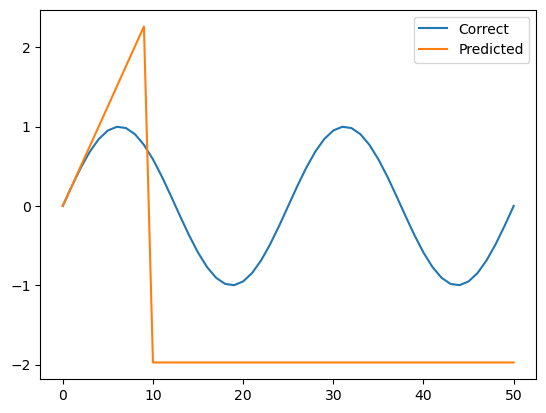

Epoch:11/101 Error:360.1006485530188
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


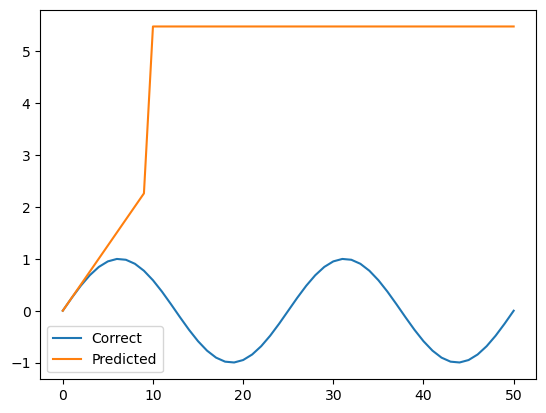

Epoch:21/101 Error:1025.9269661436672
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


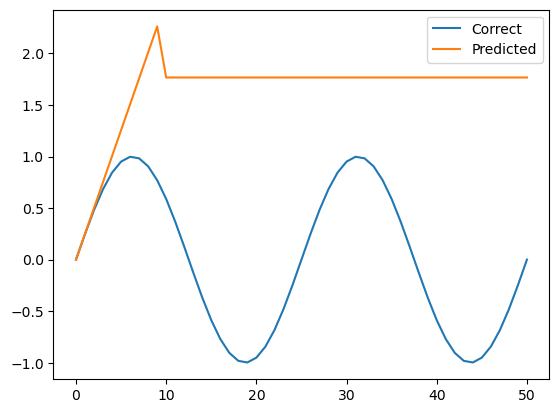

Epoch:31/101 Error:349.8773852194747
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


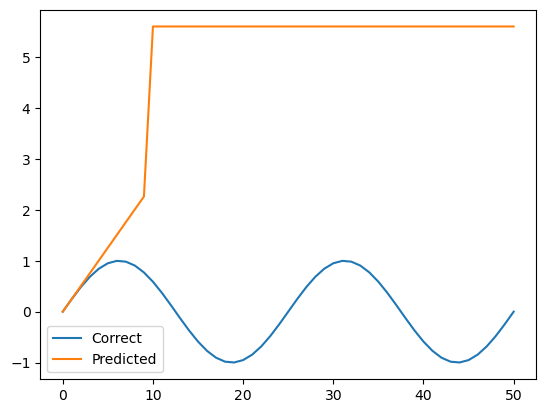

Epoch:41/101 Error:622.5997360402824
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


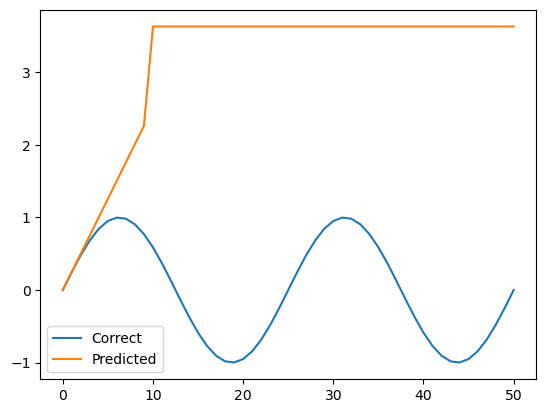

Epoch:51/101 Error:413.7680809153712
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


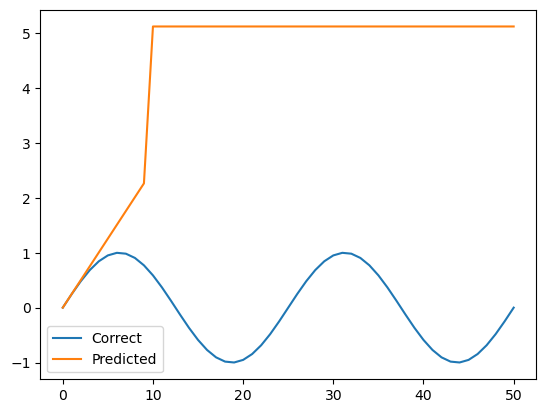

Epoch:61/101 Error:1126.6238718681877
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


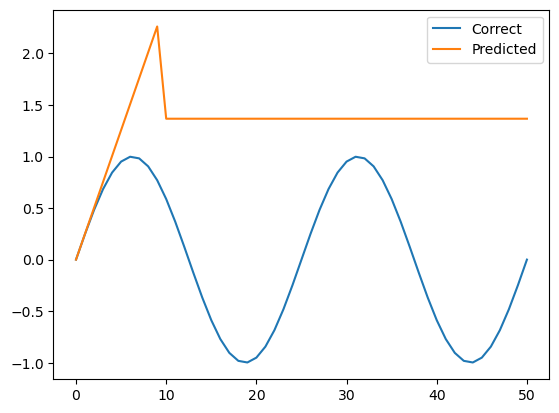

Epoch:71/101 Error:918.4353247707835
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


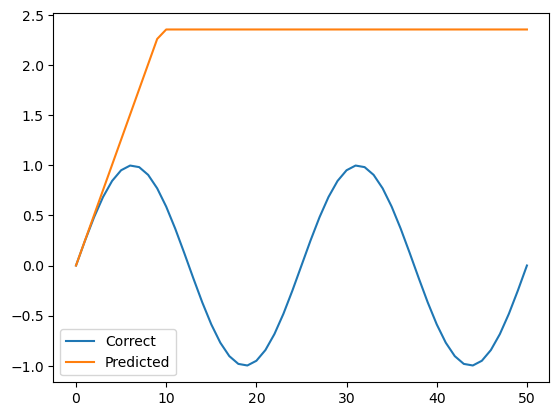

Epoch:81/101 Error:428.1145789046517
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


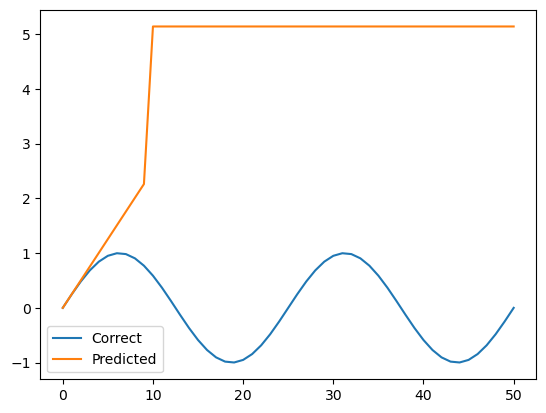

Epoch:91/101 Error:627.4991517519485
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


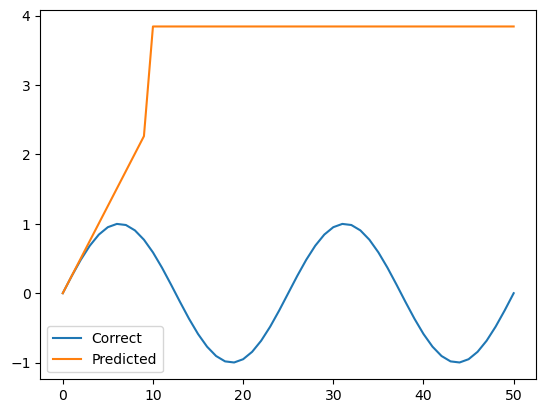

Epoch:101/101 Error:526.6807830660645
[0.0, 0.25132741228712, 0.50265482457424, 0.7539822368613599, 1.00530964914848, 1.2566370614356002, 1.5079644737227198, 1.7592918860098399, 2.01061929829696, 2.26194671058408]


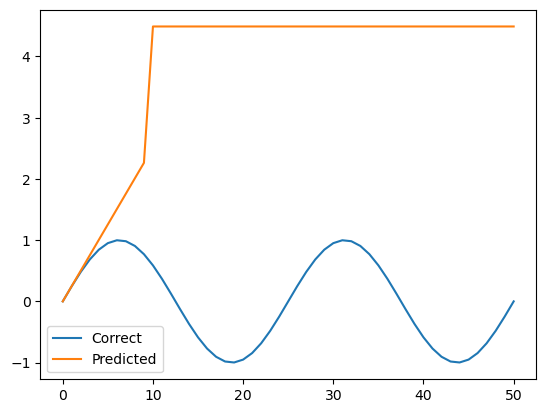

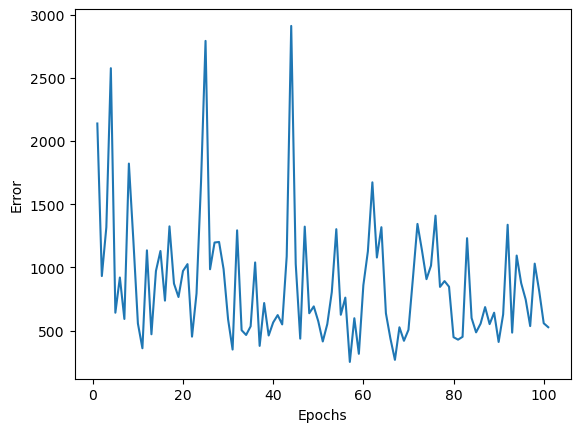

In [85]:
error_record = []
n_batch = len(input_data) // batch_size  #  # 1에포크당 배치 개수
for i in range(epochs):
    index_random = []
    for index in range(len(input_data)):
        index_random.append(index)
    random.shuffle(index_random)
    #print(np.array(index_random).shape)
    #print(index_random)
    for j in range(n_batch):
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        """
        print("mb_index",np.array(mb_index).shape)
        print(mb_index)
        """
        x_mb = []
        t_mb = []
        for index in mb_index:
            x_mb.append(input_data[index])
            t_mb.append(correct_data[index])
        """
        print("x_mb",np.array(x_mb).shape)
        print(x_mb)
        print("t_mb",np.array(t_mb).shape)
        print(t_mb)
        """
        train(x_mb, t_mb)
        #break
    #break
#################################여기부터해야햠
    error = get_error(input_data, correct_data)
    error_record.append(error)
    
     # -- 경과 표시 --
    if i%interval == 0:
        print("Epoch:"+str(i+1)+"/"+str(epochs), "Error:"+str(error))
        predicted = []
        for i in input_data[0]:#reshape(-1) 수행
            predicted.append(i[0])
        #print(predicted)
        for i in range(n_sample):
            x = [] #np.array(predicted[-n_time:]).reshape(1, n_time, 1)
            for i in range(n_time):
                #print([predicted[i]])
                x.append([predicted[i]])
            x = [x]
            y = predict(x)
            predicted.append(float(y[0][0]))  # # 출력을 predicted에 추가
            
        plt.plot(range(len(sin_y)), sin_y, label="Correct")
        plt.plot(range(len(predicted)), predicted, label="Predicted")
        plt.legend()
        plt.show()

plt.plot(range(1, len(error_record)+1), error_record)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [81]:
qw = []
for i in range(n_time):
    print([predicted[i]])
    qw.append([predicted[i]])
qw = [qw]

[0.0]
[0.25132741228712]
[0.50265482457424]
[0.7539822368613599]
[1.00530964914848]
[1.2566370614356002]
[1.5079644737227198]
[1.7592918860098399]
[2.01061929829696]
[2.26194671058408]


In [36]:
def get_error(x, t):
    y = predict(x)
    #print("y",np.array(y).shape)
    #print("t",np.array(t).shape)
    result = 1.0/2.0*Sum_1D(element_multi(element_diff(y,t),element_diff(y,t)))[0]
    return  result #1.0/2.0*np.sum(np.square(y - t))  # 오차제곱합

In [37]:
def predict(x_mb):
    # 순전파 LSTM층
    y_prev = [[0 for i in range(n_mid)] for j in range(len(x_mb))]
    c_prev = [[0 for i in range(n_mid)] for j in range(len(x_mb))]
    for i in range(n_time):
        x = custom_slice_3d(x_mb,i)
        #print("x",np.array(x).shape)
        #print("y_prev",np.array(y_prev).shape)
        #print("c_prev",np.array(c_prev).shape)
        lstm_layer.forward(x, y_prev, c_prev)
        y = lstm_layer.y
        y_prev = y
        c = lstm_layer.c
        c_prev = c

    # 순전파 출력층
    output_layer.forward(y)
    return output_layer.y